# Introduction to Training Neural Networks with Keras
## And universal function approximation
## Part of CE811, University of Essex, 2020

### Dr Michael Fairbank, University of Essex, UK

- Email: m.fairbank@essex.ac.uk


## A simple 1D function

- First build some datapoints that represent a simple 1D function, for the sake of a learning example...

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

# dataset for a simple regression problem (1 input 1 output):
x_train=np.linspace(-2,2,100).astype(np.float32).reshape(100,1)
y_train=(np.sin(x_train*math.pi)*0.3+x_train+-2).astype(np.float32).reshape(100,1)

# basically we have 100 input and output points.
# we need a neural network for regression with 1 input and 1 output.

In [2]:
print("x_train",x_train.shape, x_train[0:10])
print("y_train",y_train.shape, y_train[0:10])

x_train (100, 1) [[-2.       ]
 [-1.9595959]
 [-1.919192 ]
 [-1.8787879]
 [-1.8383838]
 [-1.7979798]
 [-1.7575758]
 [-1.7171717]
 [-1.6767677]
 [-1.6363636]]
y_train (100, 1) [[-4.       ]
 [-3.9216182]
 [-3.8438475]
 [-3.7672892]
 [-3.692525 ]
 [-3.6201077]
 [-3.5505521]
 [-3.4843278]
 [-3.4218502]
 [-3.363474 ]]


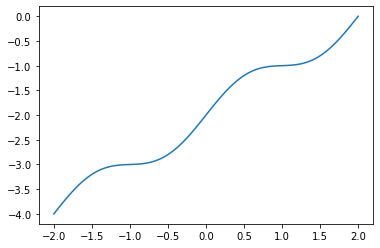

In [3]:
# show training set
plt.plot(x_train, y_train)

## Build a neural-network model capable of learning this function, from the datapoints
- Use Keras to build a 3-layer feed-forward network (i.e. with 2 hidden layers).

<img src="./images/ffnn_3layers.svg" alt="3-layer FFNN" width="400">

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define Sequential model with 3 layers
model: keras.Model = keras.Sequential(name="my_neural_network")
layer1: layers.Dense = layers.Dense(10, activation="tanh", input_shape=(1,))
"""
The first input layer.
1 input, 10 outputs.
"""
model.add(layer1)
layer2: layers.Dense = layers.Dense(10, activation="tanh")
"""
The second input layer
Sequential model so we don't need to declare how many inputs it has (automatically has 10)
10 inputs and 10 outputs.
"""
model.add(layer2)
layer3: layers.Dense = layers.Dense(1)
"""
The output layer
1 output.
"""
model.add(layer3)

In [5]:
model.summary()
# prints info about the Keras model.

Model: "my_neural_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


## Understanding the model architecture

- The above model print out shows us this is a 3-layer neural network.  

- The "Output Shape" shows us how many outputs each layer has.  The first dimension is the batch size (which is flexible, hence "None"), and the second dimension is the number of outputs for that layer.

- We can see from the final layer's output shape how many outputs this network has.

- We can see from line 7 of the code how many inputs this network has.

141 trainable parameters.
    20 on layer 1
        10 biases and 10 weights
    110 on layer 2
    11 on layer 3

**Questions:** 

1. How many inputs and how many outputs does this neural network have?  **Answer**:
    * In total, we have 1 input and 1 output
        * Layer 1 has 1 input, 10 outputs
        * Layer 2 has 10 inputs, 10 outputs
        * Layer 3 has 10 inputs, 1 output
2. Why do all of the output shapes start with "None"?  **Answer**:
    * Can put multiple input vectors into the network at same time.
    * Putting in 'None' means that it can take input vectors of any size/any number of them, flexibility
3. What is the "rank" of all of the output shapes?  **Answer**:
    * Rank 2
        * It allows 2D matrices (with width and height)
    * What other ranks mean
        * Rank 1: only allowing 1-D vectors
        * Rank 3: 3D tensors, rank 4: 4D tensors, etc.
        * tensor: multi-dimensional array



## Understanding model layers

- In this network layer1 and layer2 are called "hidden layers", because they are only used for the internal calculation of the network output.

- Each layer is parameterised by one or more tensors.  Tensors are just multidimensional arrays of numbers, e.g. a matrix or a vector.
    - E.g. a matrix of shape $5 \times 5$ is a rank-2 tensor of shape=(5,5)

- For each Dense layer, there is one weights matrix and one bias vector.  These can be seen below.  

- They are initially created with random values.


In [6]:
print("layer1 weights",layer1.trainable_weights)

layer1 weights [<tf.Variable 'dense/kernel:0' shape=(1, 10) dtype=float32, numpy=
array([[-0.48866245,  0.14203888, -0.6195455 , -0.07988727, -0.12013847,
         0.3597657 ,  0.3524446 ,  0.3216986 ,  0.7256617 , -0.36276042]],
      dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]


Question:

1. How many parameters in W and b are there for the first layer? **Answer:**
    * 10 weights
    * 10 biases

In [7]:
print("layer2 weights",layer2.trainable_weights)

layer2 weights [<tf.Variable 'dense_1/kernel:0' shape=(10, 10) dtype=float32, numpy=
array([[-0.02070498,  0.04525864, -0.28190547,  0.24812675, -0.03069782,
        -0.42828017,  0.3374983 ,  0.44505477,  0.3017345 ,  0.36715907],
       [ 0.22465342,  0.41493797, -0.4674117 , -0.33760405,  0.5163673 ,
        -0.32129866,  0.10811865,  0.00593203,  0.18500423,  0.4569466 ],
       [ 0.2933653 ,  0.41482002,  0.10797125, -0.082607  , -0.20129552,
        -0.515531  ,  0.5119132 ,  0.2521634 , -0.10400921, -0.31641927],
       [-0.20456895, -0.18662536, -0.46741378,  0.45483768,  0.2695135 ,
         0.33799648,  0.11587477, -0.01960832,  0.11545777, -0.16919091],
       [ 0.29226547, -0.00148046,  0.14363879,  0.5402714 , -0.25651905,
        -0.09546542,  0.38468897,  0.23052406,  0.11624956,  0.5266725 ],
       [-0.25965992, -0.12244892, -0.4292627 ,  0.09159702, -0.08730724,
        -0.27287823, -0.1141856 ,  0.413431  ,  0.23177958,  0.09869379],
       [-0.5092991 , -0.02854258,

In [8]:
print("layer3 weights",layer3.trainable_weights)

# 10 weights, 1 bias

layer3 weights [<tf.Variable 'dense_2/kernel:0' shape=(10, 1) dtype=float32, numpy=
array([[-0.05206126],
       [-0.13916516],
       [ 0.11660993],
       [-0.46313822],
       [ 0.5845534 ],
       [ 0.43134505],
       [ 0.5037915 ],
       [ 0.3339035 ],
       [-0.2915055 ],
       [ 0.40137774]], dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


**Questions:**

1. How many parameters in W and b are there for the second layer?  **Answer**:
    * 100 weights
    * 10 biases
2. Do these match what the model printout said (on previous slide) **Answer**:
    * Yes, I think



- Each layer acts as a callable function, and the whole model we have created acts as a callable function.

- Layer1 has a weights matrix W (with shape \[1,10\]) and a bias vector b (with shape \[10\]).
- It computes its output $y$ for an input $x$ by $y=tanh(xW+b)$

In [9]:
# Try putting a single input into the layer 1
print(layer1(np.array([[4]])))


tf.Tensor(
[[-0.96067953  0.5140034  -0.98602146 -0.30909914 -0.4466871   0.8935088
   0.887447    0.8582847   0.9939949  -0.89589864]], shape=(1, 10), dtype=float32)


Can you verify that this matches $y=tanh(xW+b)$?  
- **Do this**: Fill in the missing line of code below to help you, and check you get the same output as above.

In [10]:
x=tf.constant([[4.0]])
W=layer1.trainable_weights[0] # This is the weight matrix of shape [1,10]
b=layer1.trainable_weights[1] # This is the bias vector of shape [10]
#print(tf.matmul(x,W))  # TODO fix this line using the tensorflow functions tf.tanh(A) and tf.matmul(A,B) and the tf.add(A,B) functions.

#matmul(x,w): matrix multiplication

print(tf.tanh((tf.matmul(x,W)+b)))

# The above layer does the same thing as that line.

# multiplies x by w, adds b, then puts it through tanh

# Adding a rank 2 quantity to a rank 1 quantity: tries its best.
#   * technically you need broadcasting to do that.


tf.Tensor(
[[-0.96067953  0.5140034  -0.98602146 -0.30909914 -0.4466871   0.8935088
   0.887447    0.8582847   0.9939949  -0.89589864]], shape=(1, 10), dtype=float32)


- Note that in the final and in the above code,
  tensorflow used ["broadcasting"](https://numpy.org/devdocs/user/theory.broadcasting.html)
  to allow it to add a rank-2 tensor (a 2d array) to a rank-1 tensor (a 1d array).

- The whole network acts as a function too.  It just puts the input into the first layer,
  and then the output of that into the next layer, and so on.


**Questions:** 

1. If the $k$th layer can be written as a function $y=tanh(x.Wk+bk)$,
   then how could we write the whole network as a single mathematical function?
    **Answer:**  (Enter in markdown here):

A lot of nested copies of that function.

$Y = tanh(tanh(x.W(k-1)+b(k-1)).Wk+bk)$ for a NN consisting of layers $k$ and $k-1$?


2. Why do we need the tanh functions after every layer?
   What would happen if we removed them?  **Answer:**

tanh is the hyperbolic tangent activation function.
`sinh(x)/cosh(x) = ((exp(x) - exp(-x))/(exp(x) + exp(-x))). `
Normalizes all the components returned by the layer (ensures they are in range (-1, 1)).
Normalization -> more efficiency.

- The neural network expects its input to be a rank-2 tensor (i.e. a matrix)
- Each row of that matrix corresponds to a different input vector.

In [11]:
# Try putting a single input into the whole network
print(model(np.array([[4]])))

tf.Tensor([[0.42132664]], shape=(1, 1), dtype=float32)


In [12]:
# Try putting a "batch" of 2 input vectors through the network
print(model(np.array([[4],[2]])))

tf.Tensor(
[[0.42132673]
 [0.2298323 ]], shape=(2, 1), dtype=float32)


- Notice how even though the model function accepts 1 input, it can process
 two 1d-vector inputs at the same time.
- They are processed independently of each other -
  we see we get the same output now when we push "4" though the model as
  when we pushed "4" though on its own.

In [13]:
# Let's put a whole "batch" of x values through:
print("input vectors", x_train[0:10,:])
print("output vectors", model(np.array(x_train[0:10].reshape(10,1))))

# This is what happens when we put stuff through the untrained model.

input vectors [[-2.       ]
 [-1.9595959]
 [-1.919192 ]
 [-1.8787879]
 [-1.8383838]
 [-1.7979798]
 [-1.7575758]
 [-1.7171717]
 [-1.6767677]
 [-1.6363636]]
output vectors tf.Tensor(
[[-0.22983229]
 [-0.22490492]
 [-0.21995991]
 [-0.21499945]
 [-0.2100262 ]
 [-0.20504284]
 [-0.20005152]
 [-0.19505486]
 [-0.19005549]
 [-0.18505612]], shape=(10, 1), dtype=float32)


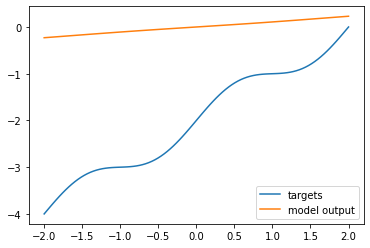

In [14]:
# Let's plot the model's current behaviour:
plt.plot(x_train, y_train, label = "targets")
plt.plot(x_train, model(x_train).numpy(),label="model output")
plt.legend()

- The above graph shows the neural network is not doing what we want it to yet
    - because we've just build our network with entirely random weights.  

## Training the neural network

So next we'll "train" the network, i.e. change the values of its weights so that its
outputs match the target curve.
Note, that by the universal function approximation theorem for neural networks,
if we have enough weights and hidden layers,
then we can in theory learn any function to arbitrary accuracy.

There is no closed-form solution to this "training" problem,
so we need to use an iterative numerical method.

First we define a loss function which we want to minimise with respect to
all of the trainable variables in the neural network.


There is no exact solution to training a neural network. Have to use an iterative procedure.

In [15]:
# We attempt to compile the model so wse can train it.

model.compile(
    optimizer=keras.optimizers.Adam(0.01),  # We're using the Adam optimizer.
    # Loss function to minimize
    loss=keras.losses.MeanSquaredError(),
    # List of metrics to monitor
    metrics=[keras.metrics.MeanSquaredError()],
)

Next we run the iterative procedure.
Here we say we're going to run a full pass through the training set
(all of the elements of x_train), 1000 times...

In [16]:
# note: re-running this cell will overwrite the 'history' info.

history = model.fit(
    x_train,
    y_train,
    batch_size=len(x_train),
    epochs=3000 # changed from 1000
    # not declaring verbose = 0, will get a lot of output.
)

Epoch 1/3000
1/1 [==============================] - 0s 216ms/step - loss: 4.9503 - mean_squared_error: 4.9503
Epoch 2/3000
1/1 [==============================] - 0s 0s/step - loss: 4.4567 - mean_squared_error: 4.4567
Epoch 3/3000
1/1 [==============================] - 0s 2ms/step - loss: 4.0179 - mean_squared_error: 4.0179
Epoch 4/3000
1/1 [==============================] - 0s 998us/step - loss: 3.6297 - mean_squared_error: 3.6297
Epoch 5/3000
1/1 [==============================] - 0s 998us/step - loss: 3.2881 - mean_squared_error: 3.2881
Epoch 6/3000
1/1 [============

Now we see how the neural network's output has (hopefully) improved...

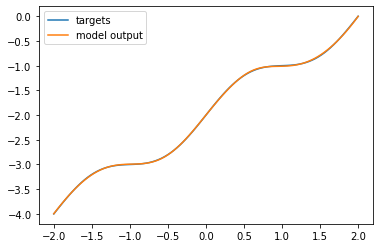

In [17]:
plt.plot(x_train, y_train, label = "targets")
plt.plot(x_train, model(x_train).numpy(),label="model output")
plt.legend()

Run the previous 2 cells again to train the network a bit more.  

We can see the universal function approximation capability of the neural network in action.

Next we'll view how some of the weights have changed from earlier, by the training process

A lot more sensible, they now do the job.

In [18]:
print("layer1 weights",layer1.trainable_weights)

layer1 weights [<tf.Variable 'dense/kernel:0' shape=(1, 10) dtype=float32, numpy=
array([[-0.8533062 ,  0.26153806, -0.8916672 , -0.23918512, -0.14560072,
         0.21557921,  0.24074903,  0.25730315,  1.1803206 , -0.25286493]],
      dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=
array([ 0.30693367, -0.20423879,  0.44215322,  0.07775711,  0.17514068,
        0.27261725,  0.23267005, -0.15711816,  1.0195516 ,  0.1700462 ],
      dtype=float32)>]


## Understanding the Training Objective, and Loss Function

These weights have changed - because the training process works by iteratively adjusting the weights to perform gradient descent on the "loss" function.  Here we used the Mean Squared Error, so we have minimised
$$L=(1/N)\sum_{k=1}^N (f({x}_k,w)-y_k)^2$$
with respect to all of the weights $w$, where $w=$(layer1.traininable_weights, layer2.trainable_weights, layer3.trainable_weights), and where $f$ is the neural network model, and $(x_k, y_k)$ are the $k$th training point's $x$ and (target) $y$ value.

We can plot how $L$ decreased over time during training...

Text(0.5, 0, 'epoch')

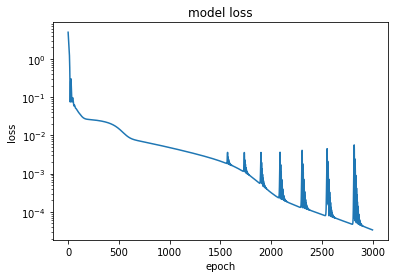

In [19]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.yscale('log')
plt.ylabel('loss')
plt.xlabel('epoch')

## Varying the Learning rate
- Try the above experiments again with a different learning rate.
- I found with learning rate Adam 0.001, I could get the neural output matching the targets almost perfectly.  **Try This**

## Saving your network

- We can save our final model, and its weights and biases, as follows:

In [20]:
model.save('saved_model')

INFO:tensorflow:Assets written to: saved_model\assets


Saves it in a subfolder with the specified name.

- We can then load it back at a later date with...

In [21]:
model2: keras.Model = keras.models.load_model('saved_model') # just need to give it a folder name here.
model2.summary()

# same structure, same summary, all weights are the ones we've learned.


Model: "my_neural_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


## Further Challenges

If you get time today then:

- What happens if we put a tanh activation function into the final layer?  Try it?
  What problems do we get for learning this particular dataset?  **Answer:**

The tanh function is between (-1, 1), so, if we were to put that there, output from model(x) will
be stuck between that range: not useful if the expected y values are outside of that range.

See below for what happens when applied to this model/dataset

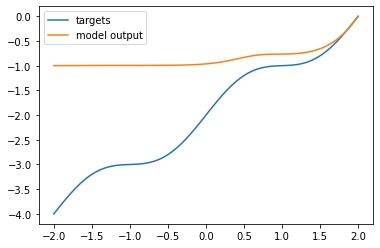

In [22]:
class TanhLayer(keras.layers.Layer):
    """
    A layer that just returns tanh(input)
    """
    def __init__(self, units=32, input_dim=32):
        super(TanhLayer, self).__init__()

    def call(self, inputs):
        """
        Just does tanh
        :param inputs: inputs
        :return: tf.tanh(inputs)
        """
        return tf.tanh(inputs)


model3: keras.Model = keras.models.load_model('saved_model')

model3.add(TanhLayer(1))

plt.plot(x_train, y_train, label = "targets")
plt.plot(x_train, model3(x_train).numpy(),label="model output")
plt.legend()

- What will happen to the function approximation capabilities of this network if we
  increase the number of nodes in each hidden layer?  **Answer:**

Becomes a more flexible function approximator with more weights (becomes more bendy basically)

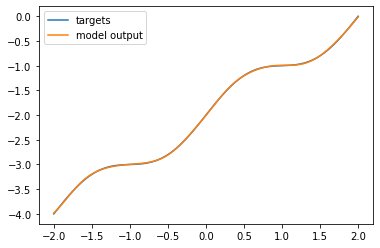

In [23]:
# Define Sequential model with 3 layers
model4: keras.Model = keras.Sequential(name="my_neural_network")
layer1_4: layers.Dense = layers.Dense(100, activation="tanh", input_shape=(1,))
"""
The first input layer.
1 input, 100 outputs.
"""
model4.add(layer1_4)
layer2_4: layers.Dense = layers.Dense(100, activation="tanh")
"""
The second input layer
Sequential model so we don't need to declare how many inputs it has (automatically has 10)
100 inputs and 100 outputs.
"""
model4.add(layer2_4)
layer3_4: layers.Dense = layers.Dense(1)
"""
The output layer
1 output.
"""
model4.add(layer3_4)


model4.compile(
    optimizer=keras.optimizers.Adam(0.01),  # We're using the Adam optimizer.
    # Loss function to minimize
    loss=keras.losses.MeanSquaredError(),
    # List of metrics to monitor
    metrics=[keras.metrics.MeanSquaredError()],
)

history4 = model4.fit(
    x_train,
    y_train,
    batch_size=len(x_train),
    epochs=3000, # changed from 1000
    verbose=0
)

plt.plot(x_train, y_train, label = "targets")
plt.plot(x_train, model4(x_train).numpy(),label="model output")
plt.legend()

## Follow-up Reading

- Learn more about the [keras train and evaluate](https://www.tensorflow.org/guide/keras/train_and_evaluate) process.

-  For most learning tasks you need a validation set too, and you can use it to check you are not overfitting the data.  See [overfit and underfit](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit)
